<a href="https://colab.research.google.com/github/ander-yamamoto/dio-bairesdev/blob/main/image_color_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img
import urllib.request
import os


import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

from PIL import Image
import numpy as np

In [110]:

# Define the URL of the image
image_url = 'https://bellard.org/bpg/lena15.jpg'

# Define a temporary path to save the image
temp_image_path = 'temp_image.jpg'

try:
    # Download the image from the URL
    urllib.request.urlretrieve(image_url, temp_image_path)

    # Load the image using Keras's load_img
    img = load_img(temp_image_path, target_size=(224, 224)) # Specify target_size if needed

    # Convert the image to a NumPy array
    img_array = np.array(img_to_array(img))

    # You can now use img_array in your Keras model
    print(f"Image loaded and converted to array with shape: {img_array.shape}")

except Exception as e:
    print(f"Error loading image from URL: {e}")

finally:
    # Clean up the temporary file
    if os.path.exists(temp_image_path):
        os.remove(temp_image_path)

Image loaded and converted to array with shape: (224, 224, 3)


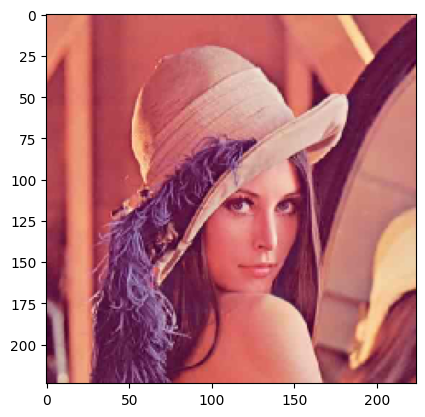

In [111]:
plt.imshow(img_array.astype('uint8'))
plt.show()

In [112]:
img_array.shape

(224, 224, 3)

In [113]:
# img_array: altura x largura x canais (RGB)
gray_array = np.array([
    [int(pixel.mean()) for pixel in line]  # percorre cada pixel da linha
    for line in img_array                    # percorre cada linha da imagem
]).astype(np.uint8)
print(gray_array.dtype)  # bool
print(gray_array.shape)  # mesma forma que a imagem

uint8
(224, 224)


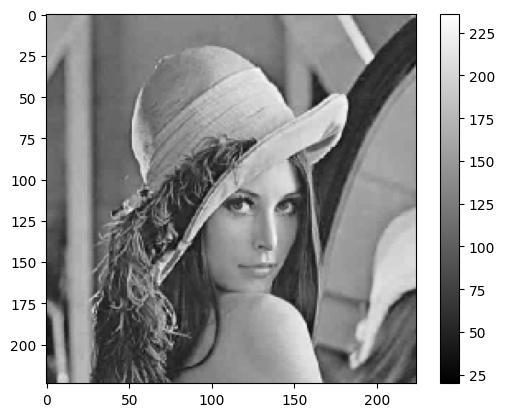

In [114]:
# gray_array: 2D
plt.imshow(gray_array, cmap='gray')  # força tons de cinza
plt.colorbar()
plt.show()

In [115]:
# Aplica threshold
threshold = 128
bw_array = gray_array >= threshold  # True para >=128, False caso contrário

print(bw_array.dtype)  # bool
print(bw_array.shape)  # mesma forma que a imagem

bool
(224, 224)


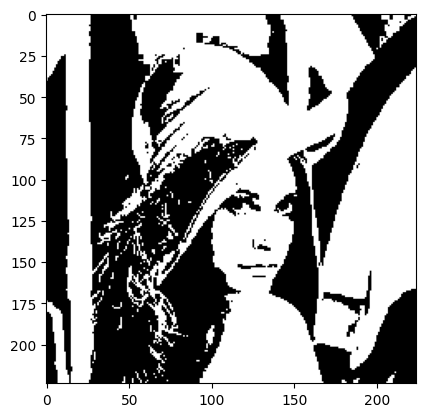

In [119]:
plt.imshow(bw_img, cmap='gray')
plt.show()

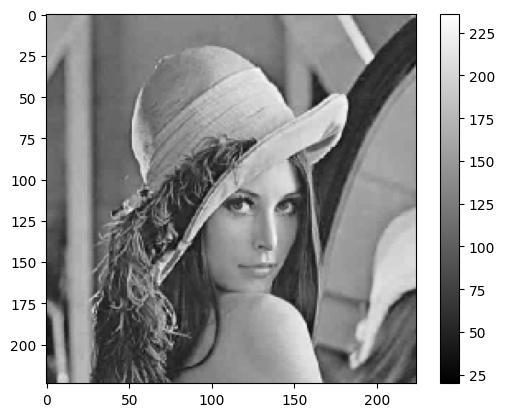

In [120]:
# niveis de cinza de acordo com o chatgpt
gray_array_gpt = (0.2989*img_array[:,:,0] +
              0.5870*img_array[:,:,1] +
              0.1140*img_array[:,:,2]).astype(np.uint8)
plt.imshow(gray_array, cmap='gray')  # força tons de cinza
plt.colorbar()
plt.show()

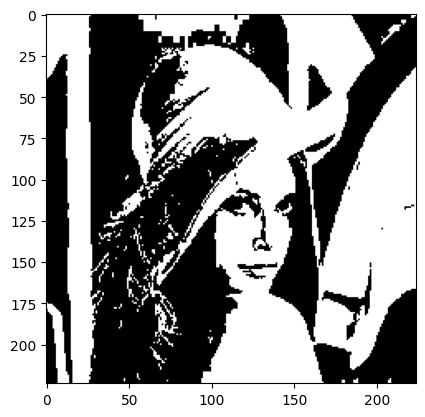

In [122]:
# preto e branco a partir do cinza gpt
threshold = 128
bw_array_gpt = gray_array_gpt >= threshold  # True para >=128, False caso contrário
plt.imshow(bw_array_gpt, cmap='gray')
plt.show()